In [11]:
pip install matplotlib numpy pandas 

Note: you may need to restart the kernel to use updated packages.


## Part 1 - Import Libraries and Data Setup

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

# Initial centroids
initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

In [26]:
print("Initial centroids:")
print(initial_centroids)

Initial centroids:
[[3. 3.]
 [2. 2.]]


## Part 2 - KMeans Class Implementation:

In [27]:
class KMeans:
    def __init__(self, n_clusters=2, max_iters=100, threshold=1e-4):
        """
        n_clusters: int, number of clusters
        max_iters: int, maximum number of iterations
        threshold: float, threshold for convergence
        self.n_clusters: int, number of clusters
        """
        # (a) => Initialization of the centroids
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.threshold = threshold
        self.labels = None  # Initialize labels attribute
        self.centroids = None  # Initialize centroids attribute
        self.n_interations = 0  # Initialize number of iterations attribute
        
    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    def fit(self, X, initial_centroids=None):
        if initial_centroids is None:
            idx = np.random.choice(len(X), self.n_clusters, replace=False)
            self.centroids = X[idx]
        else:
            self.centroids = initial_centroids.copy()
            
        for _ in range(self.max_iters):
            old_centroids = self.centroids.copy()
            
            # (b) => Assignment step 
            distances = np.array([[self.euclidean_distance(x, c) for c in self.centroids] for x in X])
            self.labels = np.argmin(distances, axis=1)
            
            # (c) => Update step
            for k in range(self.n_clusters):
                if sum(self.labels == k) > 0:
                    self.centroids[k] = np.mean(X[self.labels == k], axis=0)
            
            # (d) => Convergence check
            if np.all(np.abs(old_centroids - self.centroids) < self.threshold):
                break
                
        return self.labels, self.centroids


## Part 3 - Run KMeans with Given Centroids:

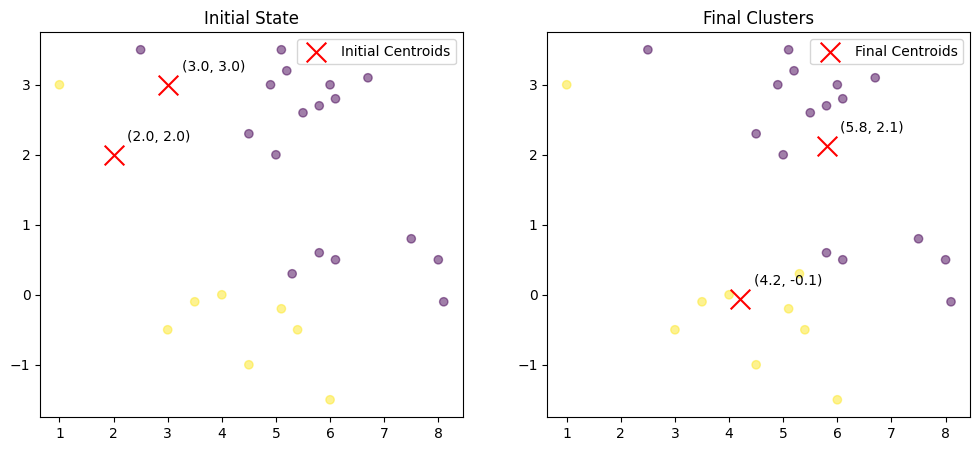

Final Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


In [28]:
plt.figure(figsize=(12, 5))

# Initial state
kmeansInitial = KMeans(max_iters=1)
labelsInitial, _ = kmeansInitial.fit(X,initial_centroids)

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labelsInitial, cmap='viridis', alpha=0.5)
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='x', s=200, label='Initial Centroids')

# Add coordinate labels for initial centroids
for idx, centroid in enumerate(initial_centroids):
    plt.annotate(f'({centroid[0]:.1f}, {centroid[1]:.1f})', 
                (centroid[0], centroid[1]), 
                xytext=(10, 10), 
                textcoords='offset points')

plt.title('Initial State')
plt.legend()

# Final state
kmeans = KMeans()
labels, final_centroids = kmeans.fit(X, initial_centroids)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=200, label='Final Centroids')

# Add coordinate labels for final centroids
for idx, centroid in enumerate(final_centroids):
    plt.annotate(f'({centroid[0]:.1f}, {centroid[1]:.1f})', 
                (centroid[0], centroid[1]), 
                xytext=(10, 10), 
                textcoords='offset points')

plt.title('Final Clusters')
plt.legend()
plt.show()

print("Final Centroids:")
print(final_centroids)


## Part 4 - Random Initialization Comparison:

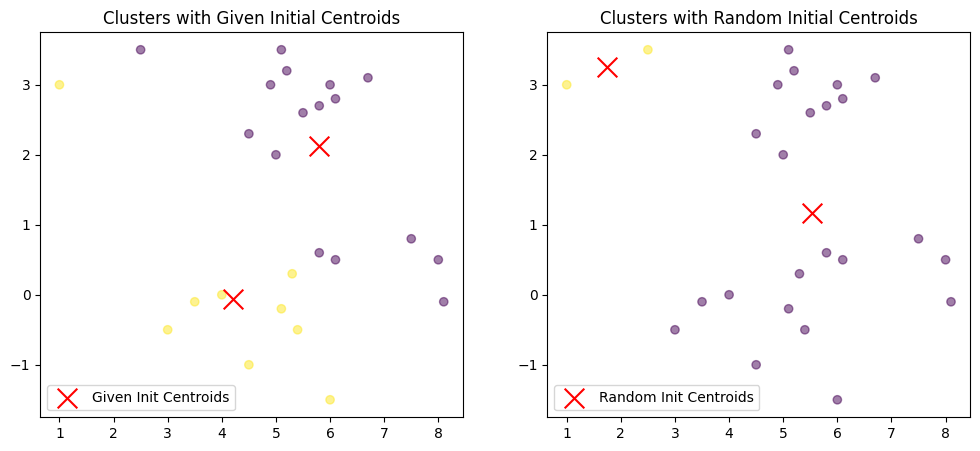

In [36]:
# Run KMeans with random initialization
kmeans_random = KMeans()
labels_random, final_centroids_random = kmeans_random.fit(X)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=200, label='Given Init Centroids')
plt.title('Clusters with Given Initial Centroids')
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels_random, cmap='viridis', alpha=0.5)
plt.scatter(final_centroids_random[:, 0], final_centroids_random[:, 1], c='red', marker='x', s=200, label='Random Init Centroids')
plt.title('Clusters with Random Initial Centroids')
plt.legend()
plt.show()

In [37]:
print("Final Centroids with Random Initialization:")
print(final_centroids_random)

Final Centroids with Random Initialization:
[[5.52608696 1.17391304]
 [1.75       3.25      ]]


## Part 5 - Elbow Method:

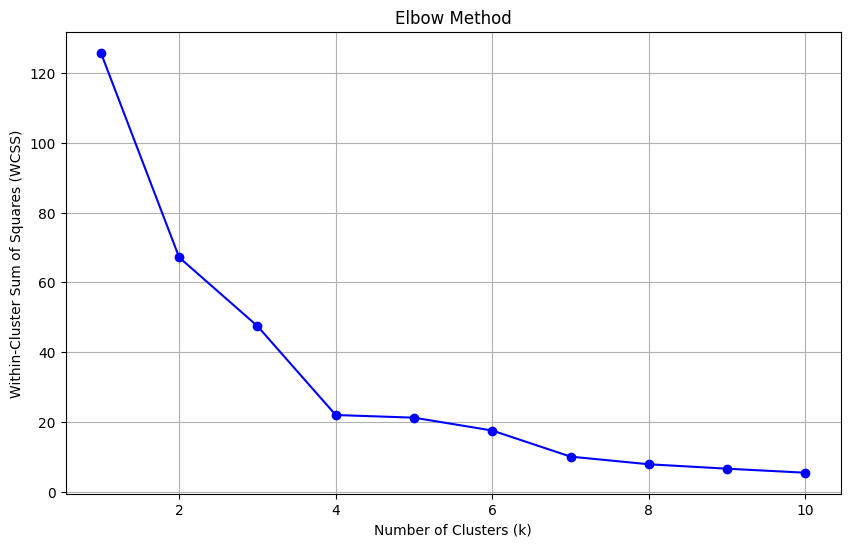

In [17]:
def calculate_wcss(X, labels, centroids):
    wcss = 0
    for i in range(len(X)):
        wcss += np.sum((X[i] - centroids[labels[i]]) ** 2)
    return wcss

# Calculate WCSS for different k values
k_values = range(1, 11)
wcss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels, centroids = kmeans.fit(X)
    wcss = calculate_wcss(X, labels, centroids)
    wcss_values.append(wcss)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


We can see that the rate of decrease in distortion or inertia starts to slow down at around 4 clusters. This elbow point often indicates the optimal number of clusters.

Therefore, using 4 clusters is a good choice.

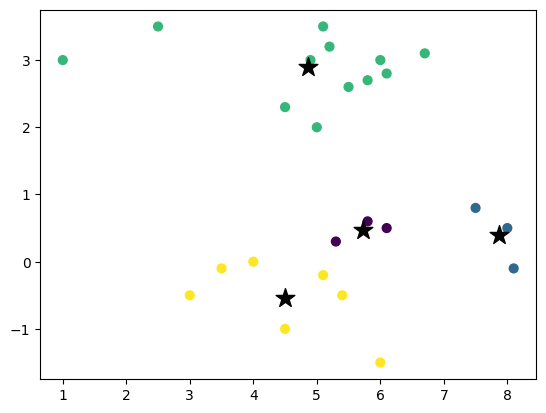

Final Centroids:
[[ 5.73333333  0.46666667]
 [ 7.86666667  0.4       ]
 [ 4.85833333  2.89166667]
 [ 4.5        -0.54285714]]


In [18]:
# doing clustering after random initialization of centroids for 4 clusters
kmeans = KMeans(n_clusters=4)
labels, final_centroids = kmeans.fit(X)
# plotting the clusters
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')
plt.scatter(final_centroids[:,0], final_centroids[:,1], marker='*', s=200, c='#050505')
plt.show()
print("Final Centroids:")
print(final_centroids)

## End Of Assignment

---

### More testing with 6 clusters

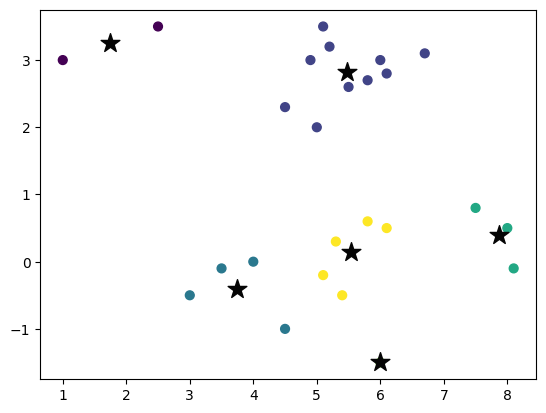

Final Centroids:
[[ 1.75        3.25      ]
 [ 5.48        2.82      ]
 [ 3.75       -0.4       ]
 [ 7.86666667  0.4       ]
 [ 6.         -1.5       ]
 [ 5.54        0.14      ]]


In [19]:
# doing clustering after random initialization of centroids for 4 clusters
kmeans = KMeans(n_clusters=6)
labels, final_centroids = kmeans.fit(X)
# plotting the clusters
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')
plt.scatter(final_centroids[:,0], final_centroids[:,1], marker='*', s=200, c='#050505')
plt.show()
print("Final Centroids:")
print(final_centroids)